In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [71]:
electorate = pd.read_html('https://en.wikipedia.org/wiki/Constituencies_of_Singapore')

In [72]:
smc = pd.DataFrame(electorate[2])
grc = pd.DataFrame(electorate[1])

In [73]:
grc['Constituency']=grc['Constituency'].replace('Group Representation Constituency', 'GRC', regex=True)
smc['Constituency']=smc['Constituency'].replace('Single Member Constituency', 'SMC', regex=True)

smc=smc.drop(columns='Polling Districts[8]')
smc=smc.drop_duplicates('Constituency')
grc=grc.drop(columns=['Polling Districts[8]', 'Minority representation', 'Wards'])
grc=grc.drop_duplicates('Constituency')

In [83]:
ideal=sum(grc['Electorate'])/sum(grc['Seats'])
ideal

28318.291139240508

In [104]:
grc['Electorate Concentration']=grc['Electorate']/grc['Seats']
smc['Electorate Concentration']=smc['Electorate']/smc['Seats']

grc['Malapportionment']=(grc['Electorate Concentration']-ideal)/grc['Electorate Concentration']
smc['Malapportionment']=(smc['Electorate Concentration']-ideal)/smc['Electorate Concentration']

In [105]:
grc

,Constituency,Seats,Electorate,Electorate Concentration,Malapportionment
0,Aljunied GRC,5,150303,30060.60,0.057960
5,Ang Mo Kio GRC,5,180186,36037.20,0.214193
10,Bishan–Toa Payoh GRC,4,100036,25009.00,-0.132324
14,Chua Chu Kang GRC,4,103231,25807.75,-0.097279
18,East Coast GRC,5,120239,24047.80,-0.177583
23,Holland–Bukit Timah GRC,4,112999,28249.75,-0.002426
27,Jalan Besar GRC,4,106578,26644.50,-0.062819
31,Jurong GRC,5,129933,25986.60,-0.089727
36,Marine Parade GRC,5,137906,27581.20,-0.026724
41,Marsiling–Yew Tee GRC,4,114243,28560.75,0.008489


In [131]:
smc

,Constituency,Seats,Electorate,Electorate Concentration,Malapportionment
0,Bukit Batok SMC,1,29389,29389.0,0.036432
1,Bukit Panjang SMC,1,35258,35258.0,0.196827
2,Hong Kah North SMC,1,23519,23519.0,-0.204060
3,Hougang SMC,1,25629,25629.0,-0.104932
4,Kebun Baru SMC,1,22413,22413.0,-0.263476
5,MacPherson SMC,1,27652,27652.0,-0.024096
6,Marymount SMC,1,23439,23439.0,-0.208170
7,Mountbatten SMC,1,23957,23957.0,-0.182047
8,Pioneer SMC,1,24679,24679.0,-0.147465
9,Potong Pasir SMC,1,18551,18551.0,-0.526510


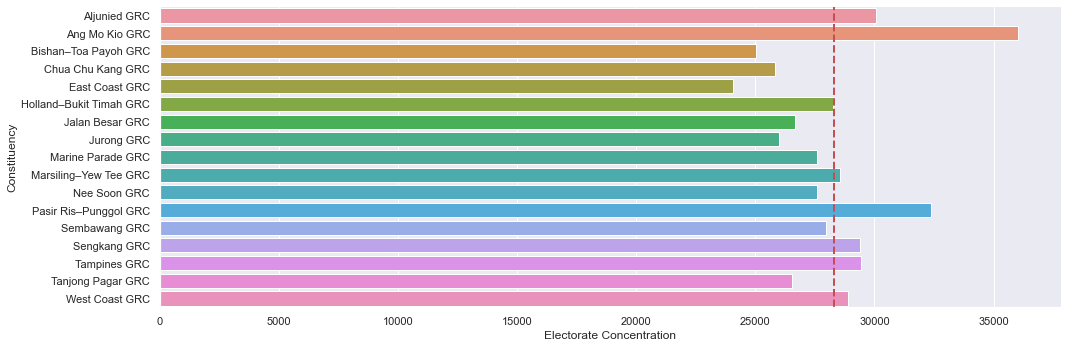

In [106]:
ec=sb.catplot(data=grc, x='Electorate Concentration', y='Constituency', kind='bar', orient='h', aspect=3)
ec.map(plt.axvline, x=28318, ls='--', color='r', linewidth=2)

plt.show()

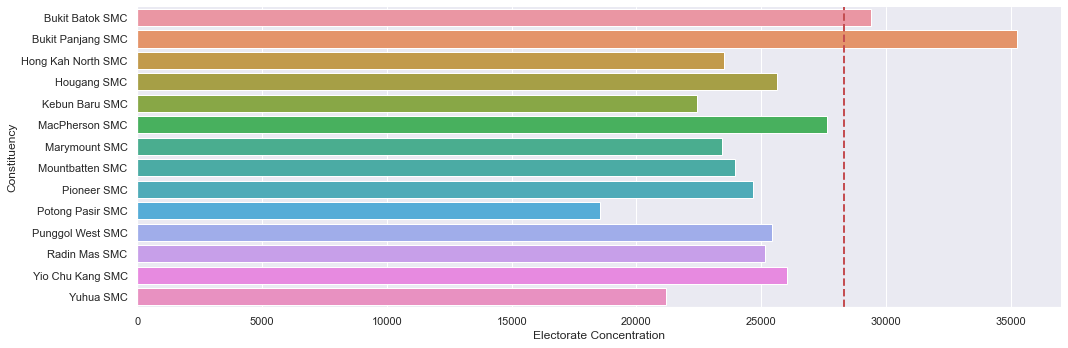

In [107]:
ec=sb.catplot(data=smc, x='Electorate Concentration', y='Constituency', kind='bar', orient='h', aspect=3)
ec.map(plt.axvline, x=28318, ls='--', color='r', linewidth=2)

plt.show()

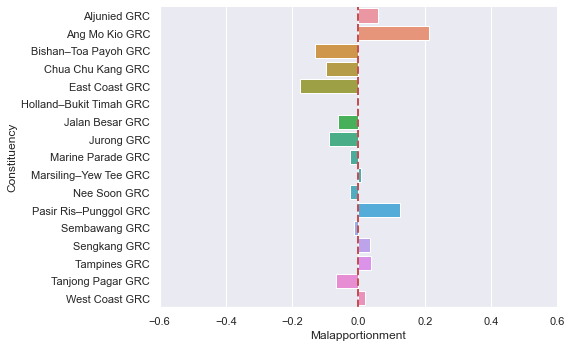

In [119]:
ec=sb.catplot(data=grc, x='Malapportionment', y='Constituency', kind='bar', orient='h', aspect=1.6)
ec.map(plt.axvline, x=0, ls='--', color='r', linewidth=2)
plt.xlim(-0.6,0.6)

plt.show()

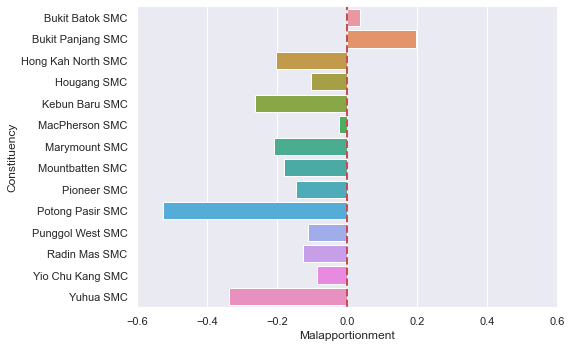

In [118]:
ec=sb.catplot(data=smc, x='Malapportionment', y='Constituency', kind='bar', orient='h', aspect=1.6)
ec.map(plt.axvline, x=0, ls='--', color='r', linewidth=2)
plt.xlim(-0.6,0.6)

plt.show()

In [169]:
ge2020 = pd.read_html('https://en.wikipedia.org/wiki/2020_Singaporean_general_election')
seatsraw = ge2020[11]
seatsraw

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Party,Party,Votes,%,Seats,+/–
2,NaN,People's Action Party,1527491,61.23,83,0
3,NaN,Workers' Party,279922,11.22,10,+4
4,NaN,Progress Singapore Party,253996,10.18,0,New
5,NaN,Singapore Democratic Party,111054,4.45,0,0
6,NaN,National Solidarity Party,93653,3.75,0,0
7,NaN,Peoples Voice,59183,2.37,0,New
8,NaN,Reform Party,54599,2.19,0,0
9,NaN,Singapore People's Party,37998,1.52,0,0


In [192]:
seats=seatsraw.iloc[1:13, 1:5]
seats.columns=seats.iloc[0]
seats=seats[1:]
seats

1,Party,Votes,%,Seats
2,People's Action Party,1527491,61.23,83
3,Workers' Party,279922,11.22,10
4,Progress Singapore Party,253996,10.18,0
5,Singapore Democratic Party,111054,4.45,0
6,National Solidarity Party,93653,3.75,0
7,Peoples Voice,59183,2.37,0
8,Reform Party,54599,2.19,0
9,Singapore People's Party,37998,1.52,0
10,Singapore Democratic Alliance,37237,1.49,0
11,Red Dot United,31260,1.25,0


In [182]:
seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 2 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Party   11 non-null     object
 1   Votes   11 non-null     object
 2   %       11 non-null     object
 3   Seats   11 non-null     object
dtypes: object(4)
memory usage: 242.0+ bytes


In [198]:
seats[['Votes', '%', 'Seats']]=seats[['Votes', '%', 'Seats']].astype(float)
seats['Seat Proportion']=(seats['Seats']/93)*100

In [199]:
seats
#seats['Seat Proportion']=seats['Seats']/93

1,Party,Votes,%,Seats,Seat Proportion
2,People's Action Party,1527491.0,61.23,83.0,89.247312
3,Workers' Party,279922.0,11.22,10.0,10.752688
4,Progress Singapore Party,253996.0,10.18,0.0,0.000000
5,Singapore Democratic Party,111054.0,4.45,0.0,0.000000
6,National Solidarity Party,93653.0,3.75,0.0,0.000000
7,Peoples Voice,59183.0,2.37,0.0,0.000000
8,Reform Party,54599.0,2.19,0.0,0.000000
9,Singapore People's Party,37998.0,1.52,0.0,0.000000
10,Singapore Democratic Alliance,37237.0,1.49,0.0,0.000000
11,Red Dot United,31260.0,1.25,0.0,0.000000


Text(0.5, -0.01, 'Proportion of Votes for Each Party')

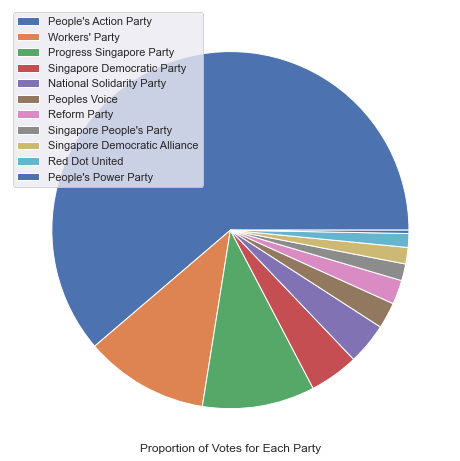

In [224]:
plt.figure(figsize=[8,16])
plt.pie(seats['%'])
plt.legend(seats['Party'], loc='upper left')
plt.title('Proportion of Votes for Each Party', y=-0.01)

Text(0.5, -0.01, 'Proportion of Seats for Each Party')

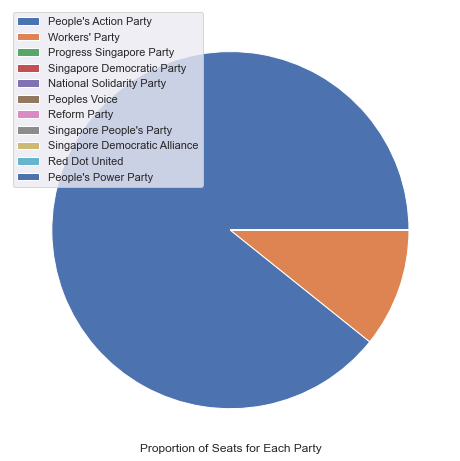

In [225]:
plt.figure(figsize=[8,16])
plt.pie(seats['Seat Proportion'])
plt.legend(seats['Party'], loc='upper left')
plt.title('Proportion of Seats for Each Party', y=-0.01)

In [226]:
seats

1,Party,Votes,%,Seats,Seat Proportion
2,People's Action Party,1527491.0,61.23,83.0,89.247312
3,Workers' Party,279922.0,11.22,10.0,10.752688
4,Progress Singapore Party,253996.0,10.18,0.0,0.000000
5,Singapore Democratic Party,111054.0,4.45,0.0,0.000000
6,National Solidarity Party,93653.0,3.75,0.0,0.000000
7,Peoples Voice,59183.0,2.37,0.0,0.000000
8,Reform Party,54599.0,2.19,0.0,0.000000
9,Singapore People's Party,37998.0,1.52,0.0,0.000000
10,Singapore Democratic Alliance,37237.0,1.49,0.0,0.000000
11,Red Dot United,31260.0,1.25,0.0,0.000000


In [338]:
votelean=(1527491-279922)/(1527491+279922)
seatlean=(83-10)/(93)

In [339]:
votelean

0.6902512043456587

In [340]:
seatlean

0.7849462365591398

In [363]:
const_v=pd.DataFrame(ge2020[12])
const_v=const_v.droplevel(level=0, axis=1)
const_v['Party']=const_v['Party'].replace(["People\'s Action Party"], 'PAP')
const_v['Party']=const_v['Party'].replace(["Workers\' Party"], 'WP')
const_v=const_v.iloc[:, [0,1,4,6]]

const_v

,Division,Seat,Party,Votes
0,Bukit Batok SMC[192],1,PAP,15500
1,Bukit Batok SMC[192],1,Singapore Democratic Party,12787
2,Bukit Panjang SMC[193],1,PAP,18085
3,Bukit Panjang SMC[193],1,Singapore Democratic Party,15576
4,Hong Kah North SMC[194],1,PAP,16347
...,...,...,...,...
59,Tampines GRC[220],5,National Solidarity Party,47875
60,Tanjong Pagar GRC[221],5,PAP,78330
61,Tanjong Pagar GRC[221],5,Progress Singapore Party,45807
62,West Coast GRC[222],5,PAP,71658


In [364]:
WPcontested=list(const_v.loc[const_v['Party'] == 'WP', 'Division'])
WPcontested

['Hougang SMC[195]',
 'Punggol West SMC[202]',
 'Sengkang GRC[211]',
 'Aljunied GRC[212]',
 'East Coast GRC[214]',
 'Marine Parade GRC[216]']

In [365]:
const_v=const_v[const_v['Division'].isin(WPcontested)]

In [366]:
const_v

,Division,Seat,Party,Votes
6,Hougang SMC[195],1,WP,15451
7,Hougang SMC[195],1,PAP,9791
21,Punggol West SMC[202],1,PAP,15655
22,Punggol West SMC[202],1,WP,10017
39,Sengkang GRC[211],4,WP,60217
40,Sengkang GRC[211],4,PAP,55319
41,Aljunied GRC[212],5,WP,85815
42,Aljunied GRC[212],5,PAP,57330
45,East Coast GRC[214],5,PAP,61144
46,East Coast GRC[214],5,WP,53375
